In [1]:
import numpy as np
from bayes_opt import BayesianOptimization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, SGD
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from talos.utils import lr_normalizer
from sklearn.metrics import mean_squared_error
from math import floor, sqrt
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping
from math import log


In [2]:
#path = "E:/Desktop/AbsorptionANN/DATA_ANN_Edited.csv"
path = "/home/hirsa/Documents/DATA_ANN_Edited.csv"

df = pd.read_csv(path, header=None)

x = df.values[:, :-1].astype('float32')
y = df.values[:, -1].astype('float32')
y = y.reshape((len(y), 1))

scaler = MinMaxScaler()
scaler.fit(df)
normalized = scaler.transform(df)
new_series = pd.DataFrame(normalized)
x = new_series.values[:, :-1].astype('float32')

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [4]:
def Abs_NN(first_neuron, second_neuron, dropout,lr,batch_size,momentum,weight_decay,activation_first, activation_second):
    path = "/home/hirsa/Documents/DATA_ANN_Edited.csv"
    df = pd.read_csv(path, header=None)
    x = df.values[:, :-1].astype('float32')
    y = df.values[:, -1].astype('float32')
    y = y.reshape((len(y), 1))
    scaler = MinMaxScaler()
    scaler.fit(df)
    normalized = scaler.transform(df)
    new_series = pd.DataFrame(normalized)
    x = new_series.values[:, :-1].astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=422)

    if activation_first<0.5:
        activation_first = 'relu'
    else:
        activation_first = 'tanh'


    if activation_second<0.5:
        activation_second = 'relu'
    else:
        activation_second = 'tanh'

    model = Sequential()
    model.add(Dense(floor(first_neuron), input_dim=5,
                    activation=activation_first,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(floor(second_neuron), input_dim=5,
                    activation=activation_second,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear',
                    kernel_initializer='random_uniform'))
    model.compile(loss='mse',
                  optimizer=RMSprop(lr=lr_normalizer(lr, RMSprop),momentum=momentum),
                  metrics='mae')
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=floor(batch_size),
                        epochs=500,
                        verbose=0)
    y_pred  = model.predict(x_test)
    MSE=mean_squared_error(y_test, y_pred)
    log_RMSE=-log(sqrt(MSE))
    return log_RMSE

In [5]:
# Bounded region of parameter space
pbounds = {'first_neuron': (30, 60), 'second_neuron': (0, 40),
            'dropout': (0, 0.1), 'lr': (0, 0.1), 
            'batch_size': (5, len(y_train)), 'momentum': (0.95, 0.999), 
            'weight_decay': (0, 0.1), 'activation_first': (0,1), 'activation_second': (0,1)}

optimizer = BayesianOptimization(
    f=Abs_NN,
    pbounds=pbounds,
    random_state=122,
)

In [6]:
optimizer.maximize(
    init_points=300,
    n_iter=700,
)

|   iter    |  target   | activa... | activa... | batch_... |  dropout  | first_... |    lr     | momentum  | second... | weight... |
-------------------------------------------------------------------------------------------------------------------------------------
|  1        | -1.411    |  0.157    |  0.7022   |  18.86    |  0.04517  |  42.24    |  0.06115  |  0.9786   |  8.58     |  0.01888  |
|  2        | -2.899    |  0.7021   |  0.4708   |  30.71    |  0.01012  |  40.81    |  0.002789 |  0.9616   |  22.36    |  0.02032  |
|  3        | -2.121    |  0.5683   |  0.8468   |  49.57    |  0.0438   |  50.91    |  0.09095  |  0.9662   |  7.423    |  0.0233   |
|  4        | -1.451    |  0.8335   |  0.01058  |  18.57    |  0.01708  |  30.46    |  0.02656  |  0.9905   |  33.38    |  0.08688  |
|  5        | -1.514    |  0.9933   |  0.05005  |  10.78    |  0.001612 |  56.51    |  0.02009  |  0.9714   |  24.38    |  0.08103  |
|  6        | -1.087    |  0.935    |  0.7508   |  6.931    | 

In [7]:
file_path = "/home/hirsa/Documents/optimizer2.txt"
import sys

with open(file_path,'w') as external:
    addtext=optimizer.max
    print(optimizer.max,file=external)
    external.close()


In [8]:
print(optimizer.max, flush=True)

{'target': -0.6504570742090504, 'params': {'activation_first': 0.6809959298207496, 'activation_second': 0.9285337158282544, 'batch_size': 7.5273950640765905, 'dropout': 0.05468666811153372, 'first_neuron': 57.60229438065276, 'lr': 0.050650692807741496, 'momentum': 0.9893869771303926, 'second_neuron': 37.633965440917926, 'weight_decay': 0.004629717382191967}}


In [9]:
def Abs_NN(first_neuron, second_neuron, dropout,lr,batch_size,momentum,weight_decay,activation_first, activation_second):
    path = "/home/hirsa/Documents/DATA_ANN_Edited.csv"
    df = pd.read_csv(path, header=None)
    x = df.values[:, :-1].astype('float32')
    y = df.values[:, -1].astype('float32')
    y = y.reshape((len(y), 1))
    scaler = MinMaxScaler()
    scaler.fit(df)
    normalized = scaler.transform(df)
    new_series = pd.DataFrame(normalized)
    x = new_series.values[:, :-1].astype('float32')
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=422)

    if activation_first<0.5:
        activation_first = 'relu'
    else:
        activation_first = 'tanh'


    if activation_second<0.5:
        activation_second = 'relu'
    else:
        activation_second = 'tanh'

    model = Sequential()
    model.add(Dense(floor(first_neuron), input_dim=5,
                    activation=activation_first,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(floor(second_neuron), input_dim=5,
                    activation=activation_second,
                    kernel_initializer='random_uniform',
                    kernel_regularizer=l2(weight_decay) ))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation='linear',
                    kernel_initializer='random_uniform'))
    model.compile(loss='mse',
                  optimizer=RMSprop(lr=lr_normalizer(lr, RMSprop),momentum=momentum),
                  metrics='mae')
    history = model.fit(x_train, y_train, 
                        validation_data=(x_test, y_test),
                        batch_size=floor(batch_size),
                        epochs=500,
                        verbose=0)
    y_pred  = model.predict(x_test)
    MSE=mean_squared_error(y_test, y_pred)
    RMSE=sqrt(MSE)
    return RMSE, model, history

In [10]:
#RMSE , model = Abs_NN(first_neuron=31, second_neuron=46, dropout=0.01763, lr=0.095, batch_size=5, momentum=0.9696, weight_decay=0.03875,activation_first=0.1, activation_second=0.6)


#RMSE , model = Abs_NN(first_neuron = optimizer.max['params']['first_neuron'],optimizer.max['params']['dropout'],
#                    optimizer.max['params']['lr'],optimizer.max['params']['batch_size'],
#                    optimizer.max['params']['momentum'],optimizer.max['params']['weight_decay'],optimizer.max['params']['activation'])

RMSE, model, history = Abs_NN(first_neuron=optimizer.max['params']['first_neuron'] ,second_neuron=optimizer.max['params']['second_neuron'], 
dropout=optimizer.max['params']['dropout'], lr=optimizer.max['params']['lr'], batch_size=optimizer.max['params']['batch_size'], 
momentum=optimizer.max['params']['momentum'], weight_decay=optimizer.max['params']['weight_decay'],activation_first=optimizer.max['params']['activation_first'], 
activation_second=optimizer.max['params']['activation_second'])


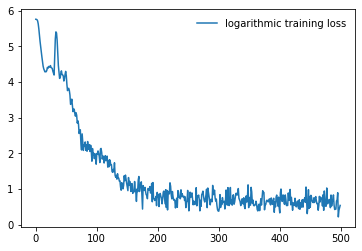

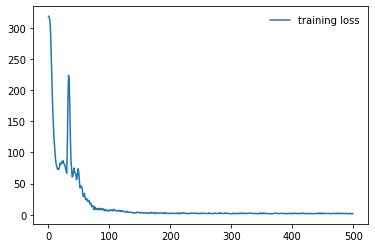

In [11]:
import matplotlib.pyplot as plt
from numpy import log
fig = plt.figure()
plt.plot(log(history.history['loss']), label='logarithmic training loss')
plt.legend(frameon=False)
plt.show()

fig = plt.figure()
plt.plot(history.history['loss'], label='training loss')
plt.legend(frameon=False)
plt.show()

Root mean square = 1.3744048217618914


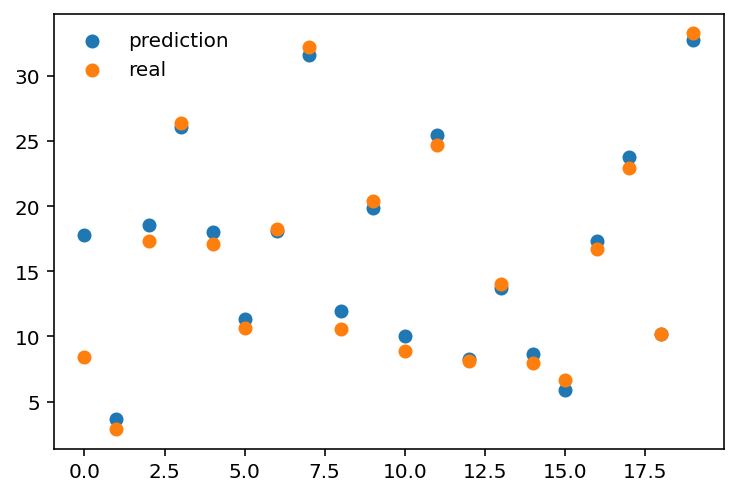

[[17.810907]
 [ 3.692008]
 [18.540157]
 [26.119238]
 [18.037857]
 [11.379036]
 [18.092012]
 [31.610062]
 [11.976382]
 [19.902508]
 [10.038268]
 [25.46569 ]
 [ 8.294686]
 [13.745199]
 [ 8.622633]
 [ 5.853015]
 [17.345228]
 [23.77144 ]
 [10.213029]
 [32.761505]]


In [16]:

y_pred  = model.predict(x_test)
from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(y_test, y_pred)
print("Root mean square = "+str(RMSE))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import math
import numpy as np

fig = plt.figure()
plt.scatter(np.arange(len(y_pred)), y_pred, label='prediction')
plt.scatter(np.arange(len(y_test)), y_test, label='real')
plt.legend(frameon=False)
plt.show()

print(y_pred)

Root mean square = 1.3744048217618914
Mean Square = 1.8889886


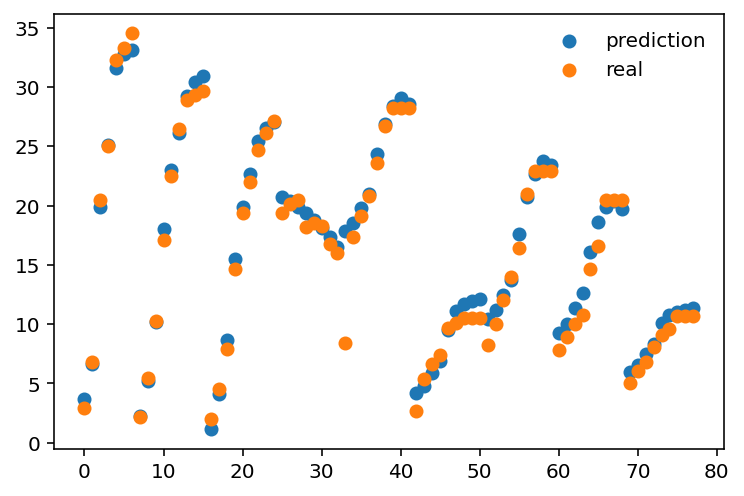

In [13]:
y_pred  = model.predict(x)
from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(y, y_pred)
RMSE=math.sqrt(MSE)
print("Root mean square = "+str(RMSE))
print("Mean Square = "+str(MSE))

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import math
import numpy as np

fig = plt.figure()
plt.scatter(np.arange(len(y_pred)), y_pred, label='prediction')
plt.scatter(np.arange(len(y)), y, label='real')
plt.legend(frameon=False)
plt.show()

In [14]:
print(y_test)

[[ 8.404213]
 [ 2.902326]
 [17.368711]
 [26.42643 ]
 [17.11172 ]
 [10.67083 ]
 [18.232727]
 [32.26567 ]
 [10.53892 ]
 [20.4281  ]
 [ 8.882175]
 [24.68175 ]
 [ 8.081123]
 [14.      ]
 [ 7.933194]
 [ 6.646707]
 [16.734518]
 [22.93333 ]
 [10.22222 ]
 [33.28683 ]]


In [15]:
print(y_pred)

[[ 3.692008 ]
 [ 6.6346397]
 [19.902508 ]
 [25.138094 ]
 [31.610062 ]
 [32.761505 ]
 [33.152466 ]
 [ 2.2322576]
 [ 5.2426634]
 [10.213029 ]
 [18.037857 ]
 [23.00724  ]
 [26.119238 ]
 [29.210352 ]
 [30.389523 ]
 [30.905872 ]
 [ 1.1680579]
 [ 4.082259 ]
 [ 8.622633 ]
 [15.496319 ]
 [19.896662 ]
 [22.678568 ]
 [25.46569  ]
 [26.561653 ]
 [27.082659 ]
 [20.757586 ]
 [20.36357  ]
 [19.902508 ]
 [19.37129  ]
 [18.767937 ]
 [18.092012 ]
 [17.345228 ]
 [16.532251 ]
 [17.810907 ]
 [18.540157 ]
 [19.765827 ]
 [20.986008 ]
 [24.364426 ]
 [26.884987 ]
 [28.402784 ]
 [29.108484 ]
 [28.570267 ]
 [ 4.1815376]
 [ 4.8040013]
 [ 5.853015 ]
 [ 6.883691 ]
 [ 9.513299 ]
 [11.064291 ]
 [11.67068  ]
 [11.976382 ]
 [12.145734 ]
 [10.418699 ]
 [11.1551695]
 [12.430213 ]
 [13.745199 ]
 [17.610088 ]
 [20.703037 ]
 [22.652014 ]
 [23.77144  ]
 [23.407246 ]
 [ 9.286484 ]
 [10.038268 ]
 [11.317161 ]
 [12.598982 ]
 [16.10092  ]
 [18.582209 ]
 [19.902508 ]
 [20.37874  ]
 [19.670845 ]
 [ 5.9317617]
 [ 6.5264387]
 [ 7.4